In [26]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
root_path = "/media/trinhnh1/3A08638408633DCF/train_data/kaggle/quick_draw/input/train_raw"

In [3]:
air_plane = os.path.join(root_path, "airplane.csv")

In [4]:
df = pd.read_csv(air_plane)
df.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[183, 178, 174, 169, 162, 156, 149, 142, 135...",5152802093400064,True,2017-03-08 21:12:07.266040,airplane
1,CA,"[[[785, 787, 796, 812, 815, 820, 827, 834, 852...",6622904974311424,False,2017-03-06 21:39:04.690130,airplane
2,US,"[[[586, 586, 584, 583, 582, 581, 580, 580, 580...",6577010312740864,True,2017-03-23 02:08:35.229980,airplane
3,US,"[[[539, 532, 526, 519, 513, 508, 502, 495, 490...",5643224746033152,True,2017-03-10 00:35:17.531970,airplane
4,IL,"[[[217, 212, 201, 186, 165, 142, 121, 100, 78,...",6670046841536512,True,2017-01-23 18:11:11.658170,airplane


In [191]:
key_id = df["key_id"]
countrycode = df["countrycode"]
recognized = df["recognized"]
timestamp = df["timestamp"]
word = df["word"]
drawing = df["drawing"].apply(ast.literal_eval)

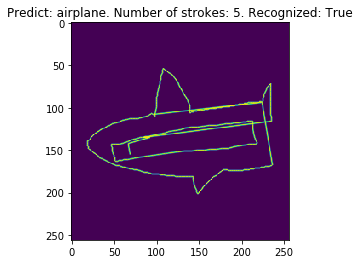

In [312]:
def drawing_to_image(drawing, idx, H=256, W=256):
    strokes = []
    for t, stroke in enumerate(drawing[idx]):
        strokes.append(np.array(stroke).T)
    
    strokes = np.concatenate(strokes)
    
    x_max = strokes[:,0].max()
    y_max = strokes[:,1].max()
    x_min = strokes[:,0].min()
    y_min = strokes[:,1].min()

    w = x_max - x_min
    h = y_max - y_min

    s = max(w,h)
    norm_strokes = (strokes-[x_min,y_min,0])/s
    norm_strokes = (norm_strokes-[w/s*0.5,h/s*0.5,0])*max(W,H)*0.85
    norm_strokes = np.floor(norm_strokes + [W/2,H/2,0]).astype(np.int32)

    image = np.full((H,W,3),0,np.uint8)
    for i in range(len(norm_strokes)-1):
        x0, y0 = norm_strokes[i][:-1]
        x1, y1 = norm_strokes[i+1][:-1]
        color = (255, 255, 255)
        cv2.line(image, (x0,y0), (x1,y1), color, 1, cv2.LINE_AA)
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)/255.
    
    plt.imshow(image_gray)
    plt.title('Predict: '+word[5]+'. Number of strokes: '+str(len(drawing[idx]))+'. Recognized: ' + str(recognized[5]))
    #return image, image_gray

drawing_to_image(drawing, 100)